<a href="https://colab.research.google.com/github/vienskaz/CTSegmentationCNN/blob/main/CTSegmentationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import pandas as pd
from PIL import Image
import random
import math
import tensorflow_datasets as tfds
from tensorflow.keras import Model
from tensorflow.keras import layers, models
from sklearn.metrics import precision_score, recall_score, f1_score

ModuleNotFoundError: ignored

In [ ]:
data_path="/content/drive/MyDrive/Arkusze/Patients_CT"

patients=[]
for i in range(49,131):
  if i <100:
    formated='0'+str(i)
    patients.append(formated)
  else:
    formated=str(i)
    patients.append(formated)


image_data=[]
masks=[]
for patient in patients:
  patient_path=os.path.join(data_path,patient,'brain')
  print(f'{patient}/130')

  for image_file in os.listdir(patient_path):
    hge="HGE"
    image_path=os.path.join(patient_path,image_file)
    if hge in image_path:
      mask=Image.open(image_path).convert("L")
      mask=np.array(mask)
      masks.append(mask)
      imagename = os.path.basename(image_path)
      parts = imagename.split("_")
      number = parts[-3]
      image_data_file=Image.open(os.path.join(patient_path,str(number)+'.jpg')).convert("L")
      image_data_file=np.array(image_data_file)
      image_data.append(image_data_file)

049/130
050/130
051/130
052/130
053/130
054/130
055/130
056/130
057/130
058/130
059/130
060/130
061/130
062/130
063/130
064/130
065/130
066/130
067/130
068/130
069/130
070/130
071/130
072/130
073/130
074/130
075/130
076/130
077/130
078/130
079/130
080/130
081/130
082/130
083/130
084/130
085/130
086/130
087/130
088/130
089/130
090/130
091/130
092/130
093/130
094/130
095/130
096/130
097/130
098/130
099/130
100/130
101/130
102/130
103/130
104/130
105/130
106/130
107/130
108/130
109/130
110/130
111/130
112/130
113/130
114/130
115/130
116/130
117/130
118/130
119/130
120/130
121/130
122/130
123/130
124/130
125/130
126/130
127/130
128/130
129/130
130/130


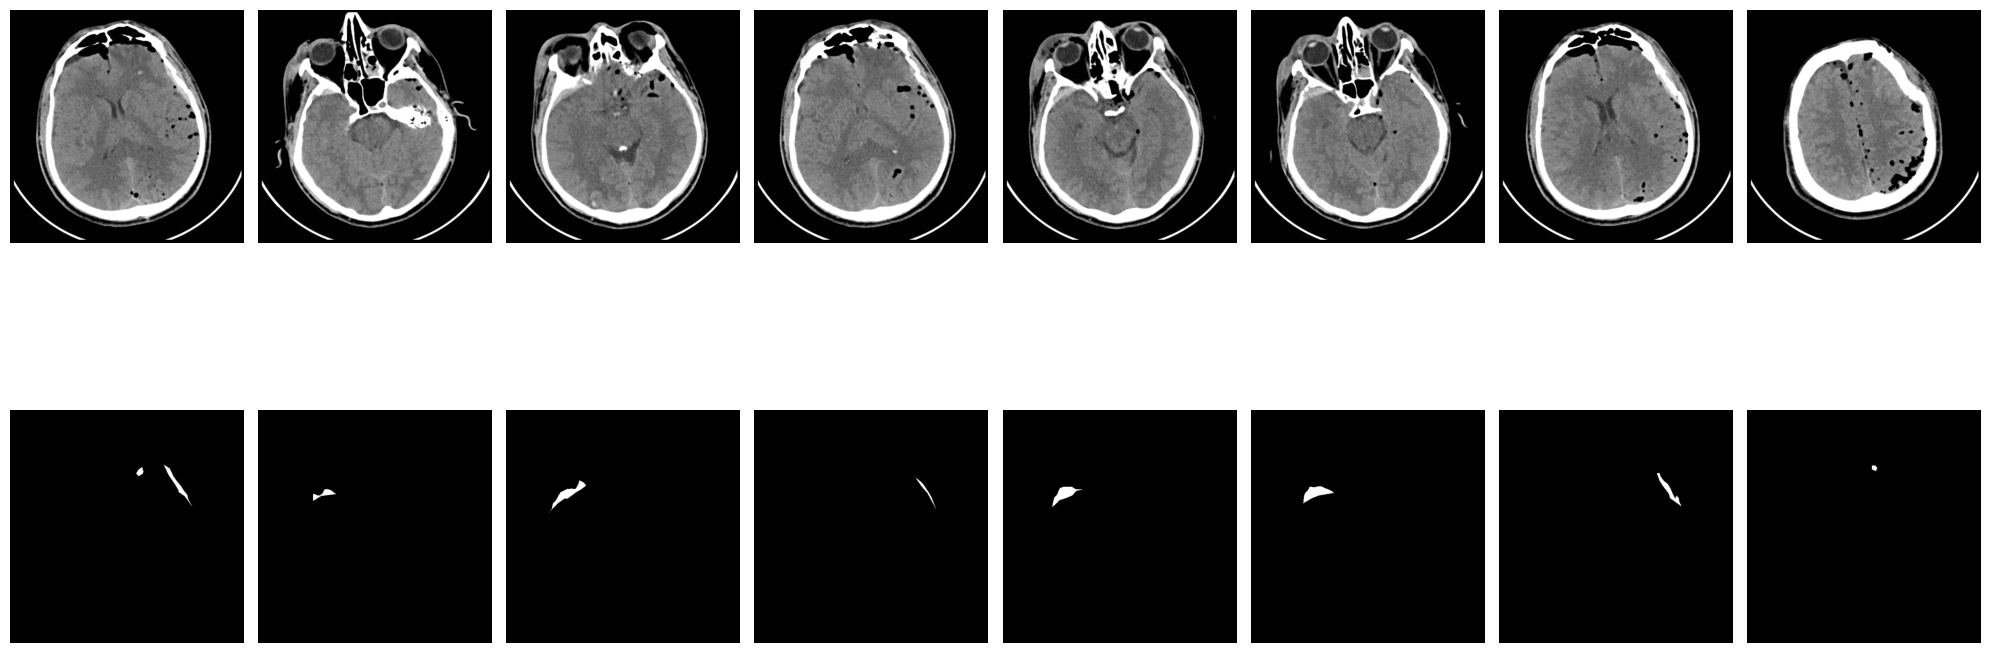

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(8):
    plt.subplot(2, 8, i + 1)
    plt.imshow(image_data[i], cmap='gray')
    plt.axis('off')

for i in range(8):
    plt.subplot(2, 8, i + 9)
    plt.imshow(masks[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
split_ratio=(0.2,0.8)

image_data = np.array(image_data)
masks = np.array(masks)


train_images, test_images, train_masks, test_masks = train_test_split(image_data, masks, test_size=split_ratio[0], random_state=42)

In [ ]:
def normalize(input_images, input_masks,size=256):

  images=[]
  masks=[]
  for image in input_images:
    image=cv2.resize(image,(size,size))
    image=image/255.0
    images.append(image)

  for mask in input_masks:
    mask=cv2.resize(mask,(size,size))
    mask=mask/255.0
    masks.append(mask)

  input_masks -= 1

  return np.asarray(images),np.asarray(masks)




In [ ]:
train_images,train_masks=normalize(train_images,train_masks)
test_images,test_masks=normalize(test_images,test_masks)

NameError: ignored

In [ ]:
# Assuming you have defined train_dataset, test_dataset, model, train_steps_per_epoch, and test_steps_per_epoch as shown in previous examples
train_steps_per_epoch = len(train_images) // batch_size
test_steps_per_epoch = len(test_images) // batch_size
history=model.fit(
    train_dataset,
    epochs=5,
    steps_per_epoch=train_steps_per_epoch,  # Specify the number of steps for each epoch
    validation_data=test_dataset,
    validation_steps=test_steps_per_epoch  # Specify the number of steps for each validation epoch
)


Epoch 1/5
7/7 [==============================] - 38s 1s/step - loss: 0.1145 - accuracy: 0.9894 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
7/7 [==============================] - 9s 1s/step - loss: 0.1145 - accuracy: 0.9894 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
7/7 [==============================] - 10s 1s/step - loss: 0.1145 - accuracy: 0.9894 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 10s 1s/step - loss: 0.1145 - accuracy: 0.9894 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
7/7 [==============================] - 10s 1s/step - loss: 0.1145 - accuracy: 0.9894 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [ ]:
print(model.summary())

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_39 (Conv2D)             (None, 256, 256, 64  640         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_40 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_39[0][0]']              
                                )                                                           

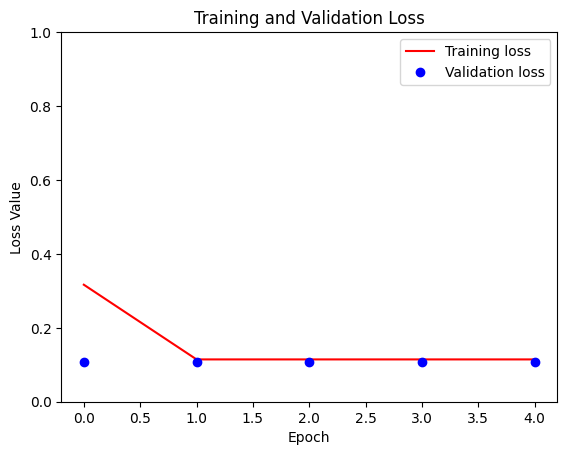

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(history.epoch, loss, 'r', label='Training loss')
plt.plot(history.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
predicted_masks=model.predict(test_images)

2/2 [==============================] - 0s 398ms/step


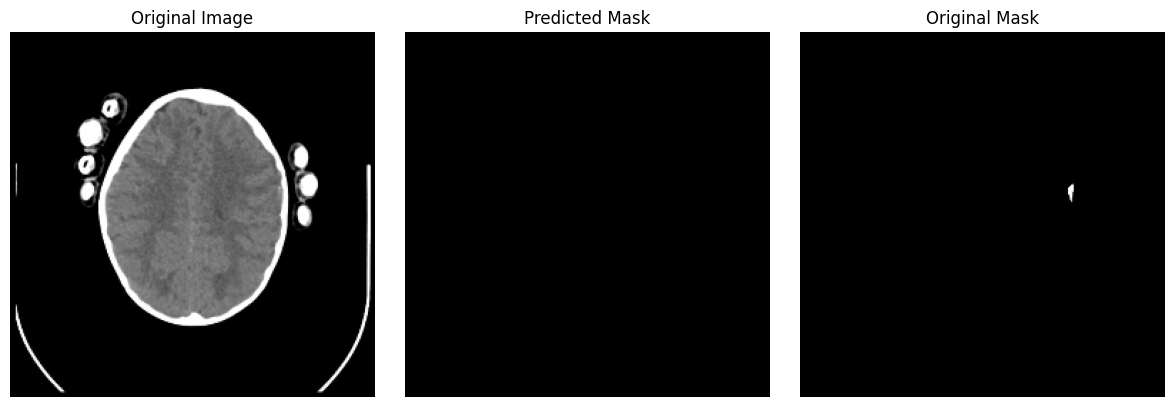

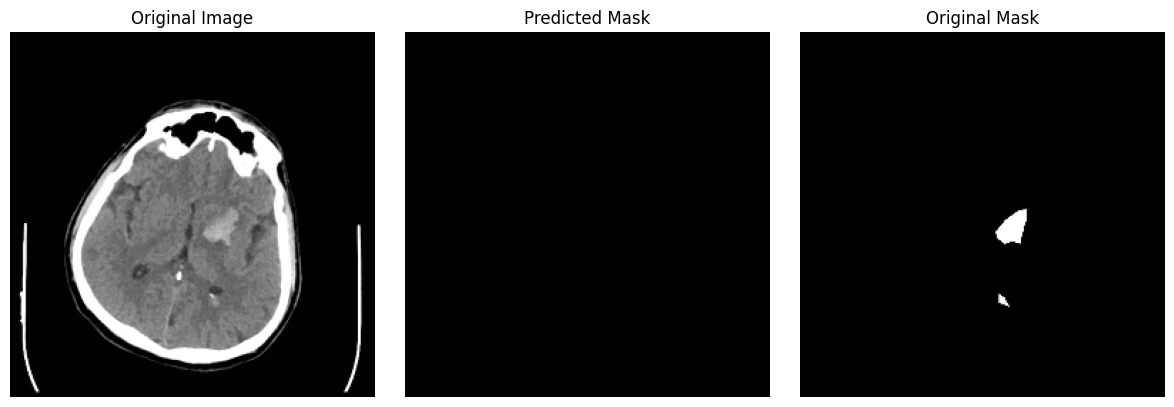

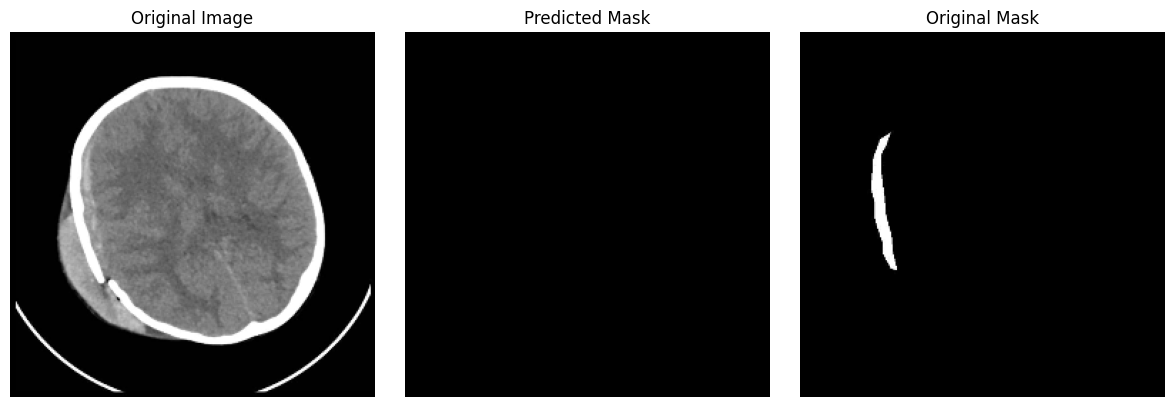

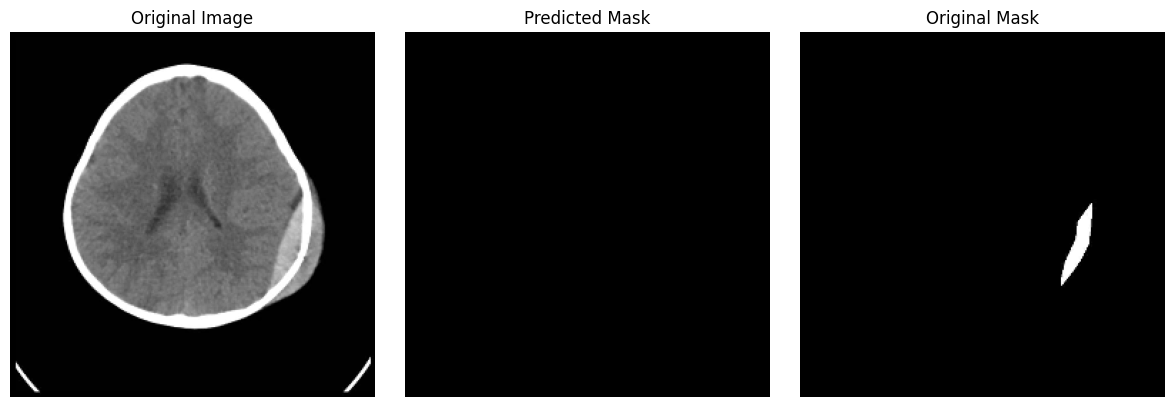

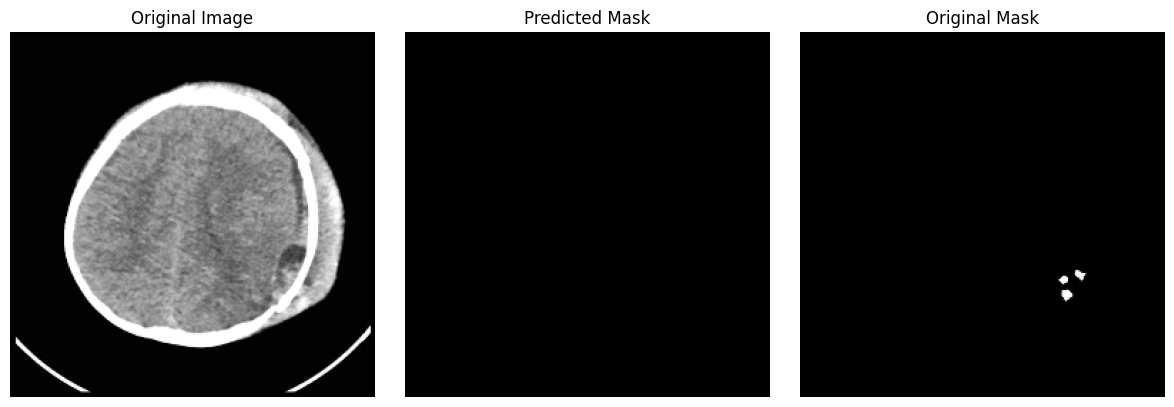

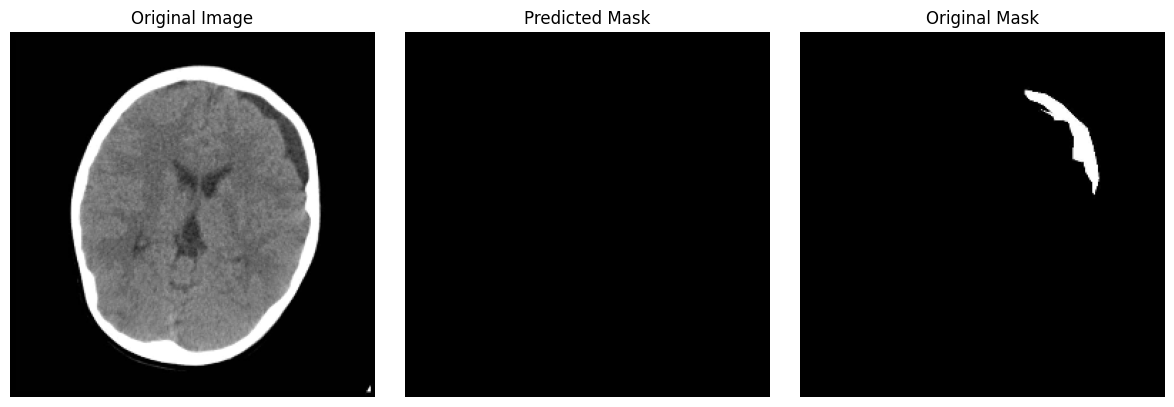

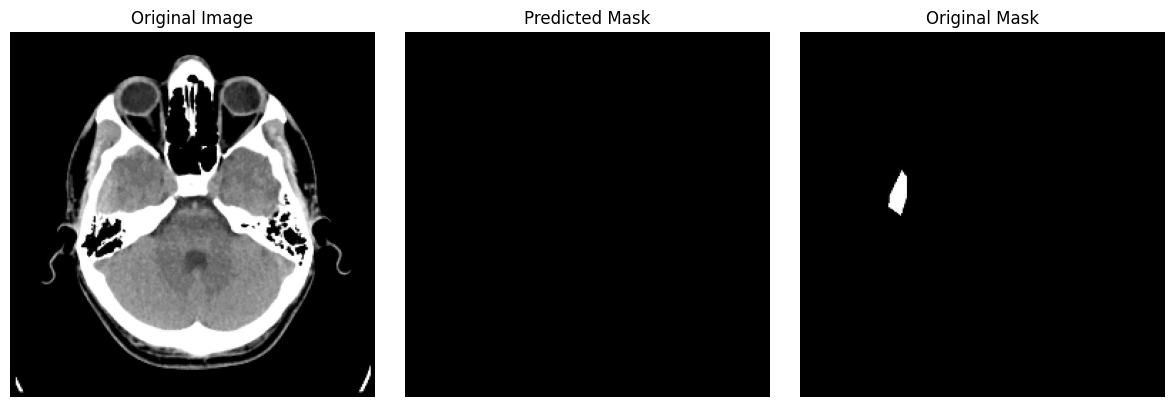

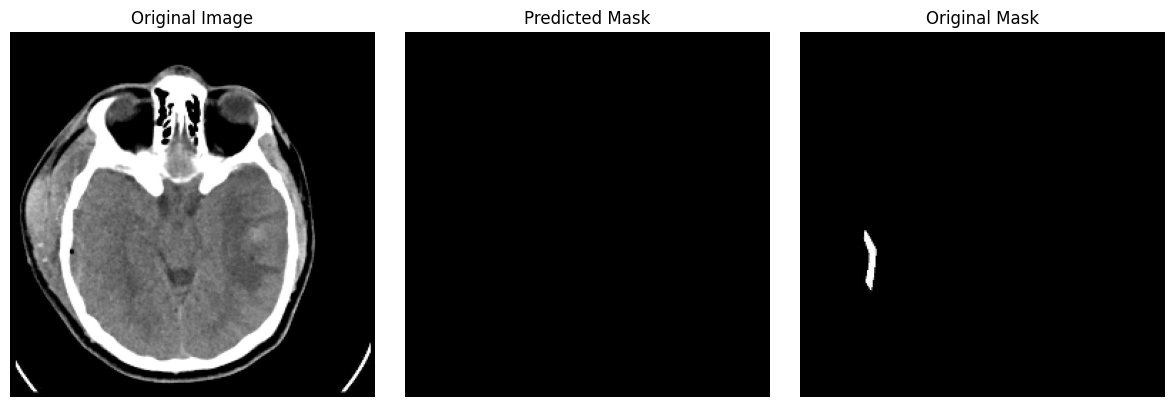

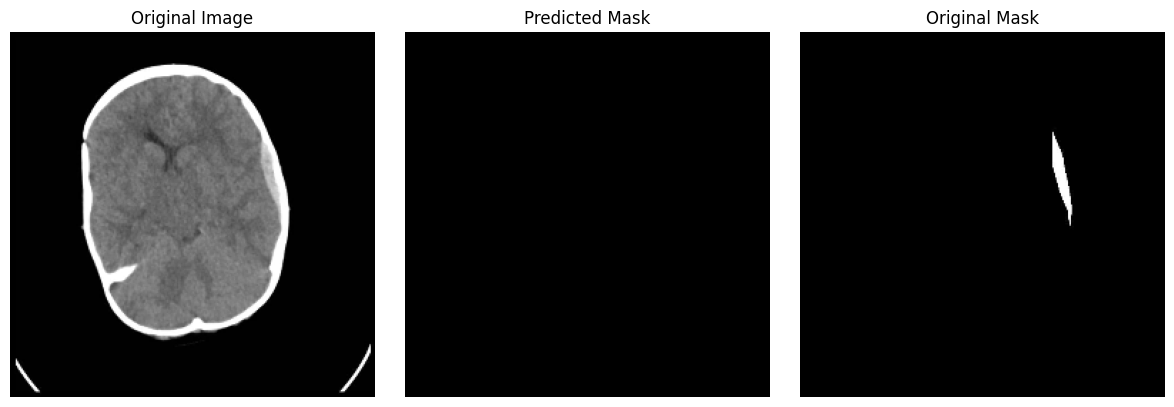

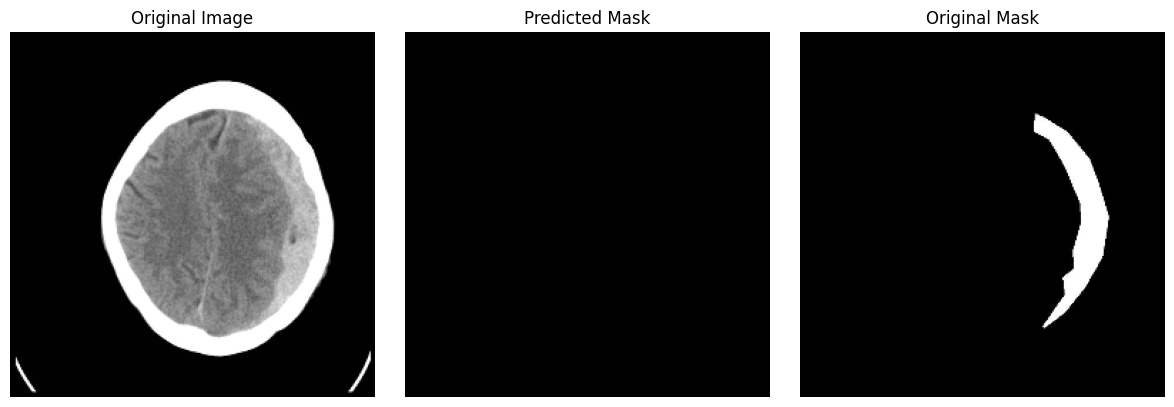

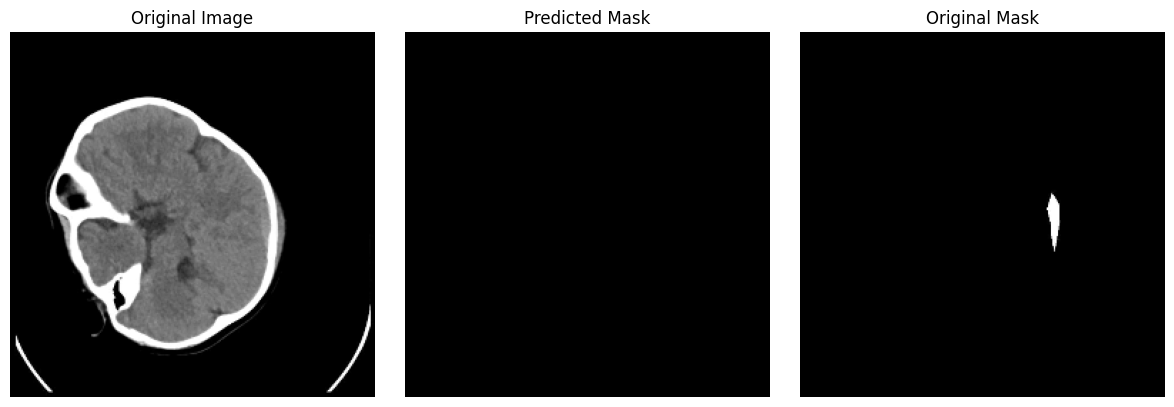

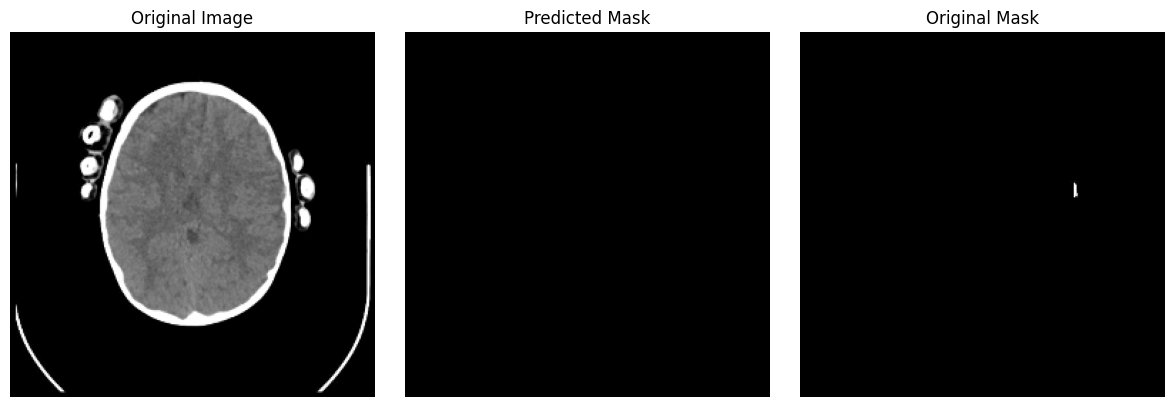

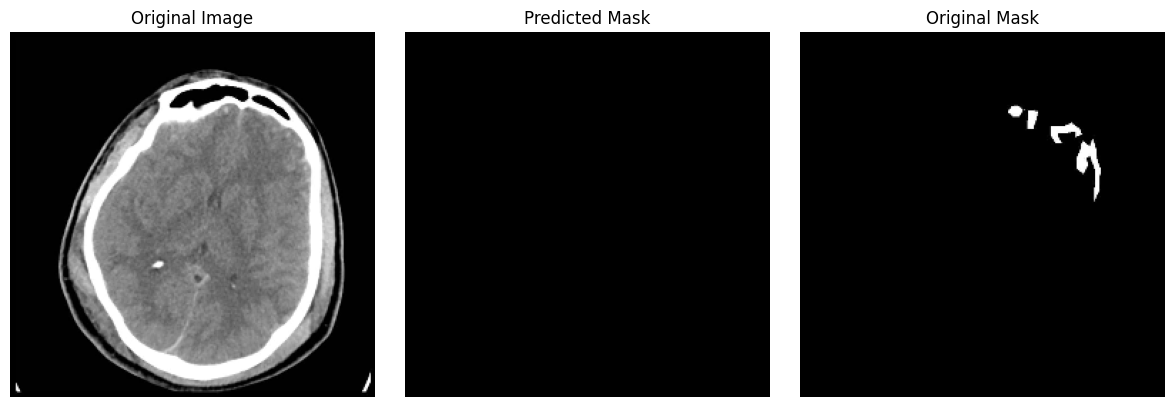

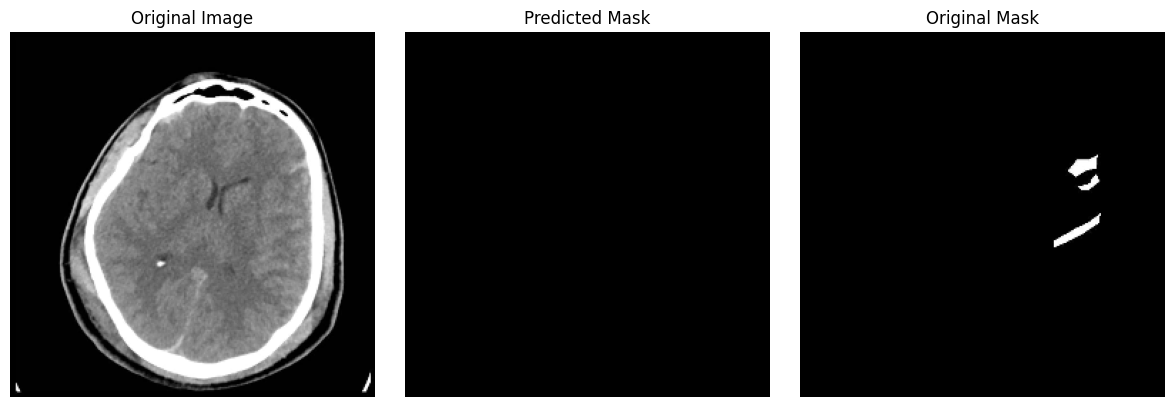

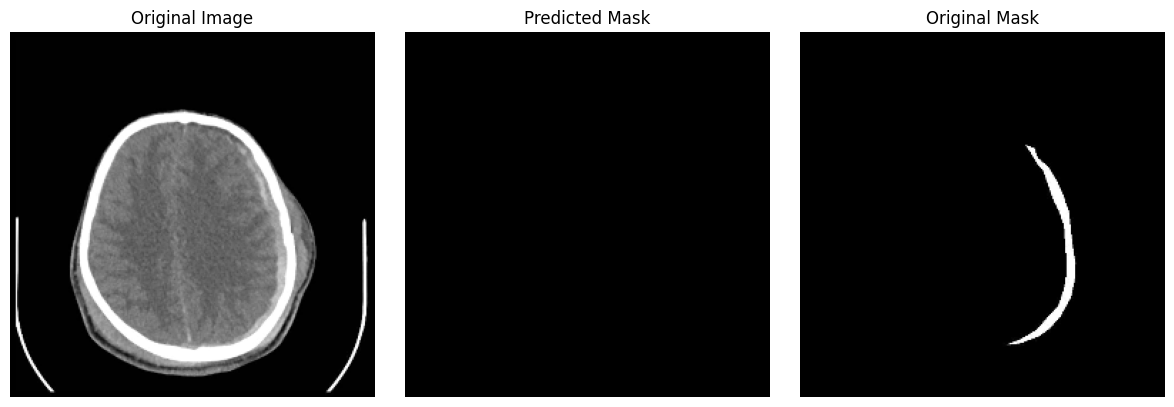

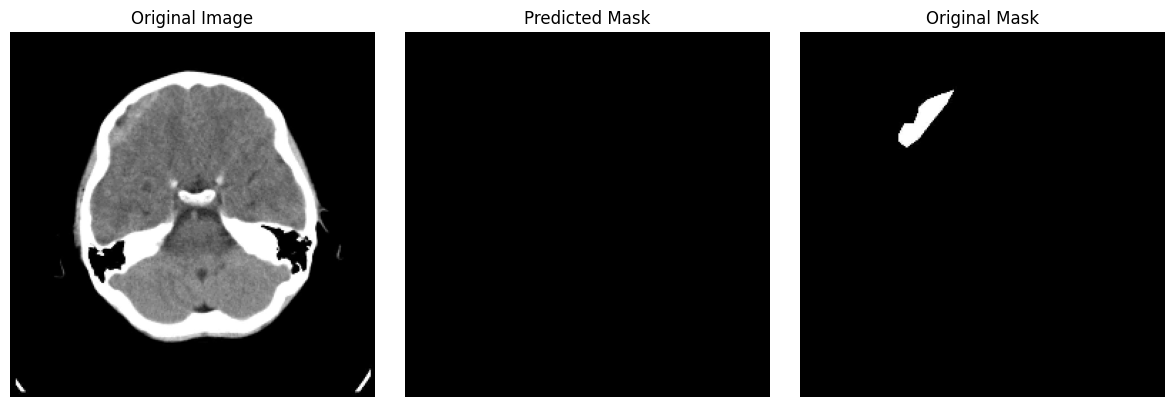

In [ ]:
num_samples_to_plot = 16  # Number of samples to plot
for i in range(num_samples_to_plot):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(predicted_masks[i].squeeze(), cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(test_masks[i], cmap='gray')  # Assuming you have a 'test_masks' variable
    plt.title("Original Mask")
    plt.axis('off')

    plt.tight_layout()
    plt.show()